In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [4]:
mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1.0, 0.8], [0.7, 1.6]])

data = np.random.multivariate_normal(mean_01, cov_01, 800)
print data.shape

(800, 2)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: covariance is not positive-semidefinite.


In [8]:
print np.cov(data, rowvar=False)

[[0.99296527 0.7989723 ]
 [0.7989723  1.69756323]]


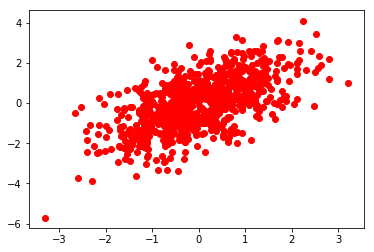

In [5]:
plt.scatter(data[:,0], data[:, 1], c='r')
plt.show()

In [12]:
def pca(X, d=None):
    if d==None:
        d = X.shape[1]
    
    ## Compute the covariance matrix
    A = np.cov(X, rowvar=False)
    
    ## EigenValues and EigenVectors
    eig_vals, eig_vecs = np.linalg.eig(A)
    
    ## Project to a new vector space
    Z = X.dot(eig_vecs)
    
    ## Reduced Dimensions
    red_Z = Z[:, :d]
    
    return eig_vals, eig_vecs, Z, red_Z

In [14]:
eig_vals, eig_vecs, Z, red_Z = pca(data, d=1)
print eig_vals.shape
print eig_vecs.shape
print Z.shape
print red_Z.shape

(2,)
(2, 2)
(800, 2)
(800, 1)


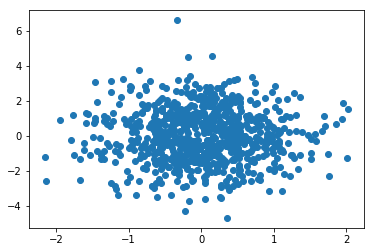

(800,)


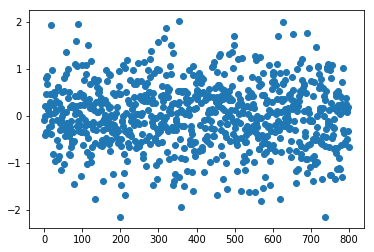

In [28]:
plt.scatter(Z[:, 0], Z[:, 1])
plt.show()

index = np.array(range(red_Z.shape[0]))
#print index
print index.shape
plt.scatter(index[:],red_Z[:,0])
plt.show()

In [29]:
info = []
for ix in range(eig_vals.shape[0]):
    dx = [eig_vals[ix], eig_vecs[:, ix]]
    info.append(dx)
print info

[[0.47206821413201583, array([-0.83769303,  0.54614137])], [2.218460286626426, array([-0.54614137, -0.83769303])]]


In [30]:
info = sorted(info, reverse=True, key=lambda z:z[0])
print info

[[2.218460286626426, array([-0.54614137, -0.83769303])], [0.47206821413201583, array([-0.83769303,  0.54614137])]]


In [32]:
sorted_vals = []
sorted_vecs = []
for ix in range(eig_vals.shape[0]):
    sorted_vals.append(info[ix][0])
    sorted_vecs.append(info[ix][1])
sorted_vals = np.asarray(sorted_vals)
sorted_vecs = np.asarray(sorted_vecs)
print sorted_vals.shape
print sorted_vecs.shape

(2,)
(2, 2)


In [33]:
explained_variances_ratio = sorted_vals/sum(sorted_vals)
print explained_variances_ratio

[0.82454443 0.17545557]


In [35]:
## ON MNIST DATA
df = pd.read_csv('/home/ayush/Downloads/mnist_train.csv')
df.head(n=3)

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
mnist_data = df.values[:10000, 1:]
mnist_labels = df.values[:10000, 0]

In [37]:
eig_vals, eig_vecs, Z, red_Z = pca(mnist_data)

In [38]:
print eig_vals.shape
print eig_vecs.shape
print Z.shape

(784,)
(784, 784)
(10000, 784)


In [40]:
info = []
for ix in range(eig_vals.shape[0]):
    dx = [eig_vals[ix], eig_vecs[:, ix]]
    info.append(dx)
info = sorted(info, reverse=True, key=lambda z:z[0])

sorted_vals = []
sorted_vecs = []
for ix in range(eig_vals.shape[0]):
    sorted_vals.append(info[ix][0])
    sorted_vecs.append(info[ix][1])
sorted_vals = np.asarray(sorted_vals)
sorted_vecs = np.asarray(sorted_vecs)
print sorted_vals.shape
print sorted_vecs.shape

(784,)
(784, 784)


In [41]:
explained_variances_ratio = sorted_vals/sum(sorted_vals)

In [43]:
cumulative_explained_ratio = np.cumsum(explained_variances_ratio)

In [45]:
print cumulative_explained_ratio[350]

(0.9925831043351312+0j)


In [46]:
arr = np.array([1,2,3,4,5])
print np.cumsum(arr)

[ 1  3  6 10 15]


/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


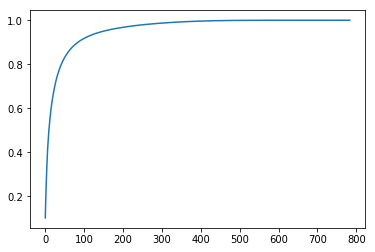

In [42]:
plt.plot(np.cumsum(explained_variances_ratio))
plt.show()